# Predicting heart disease using machine learning

This notebookk looks into using various Python-based machine learning and data science libraries in an arrempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement:

## 2. Data
We are using the UCI dataset from: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

>If we can reach 95% accuracy at predicting wherther a patient has heart disease during proof of concept, we'll pursue the project.

## 4. Features

### Create a data dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [4]:
# Import the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
np.seterr(divide="ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [7]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration

The goal here is to learn more about the data and become a subhect metter expert on the dataset.

1. What questions are we trying to solve?
2. What kind of data do we hace and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get more out of our data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# Let's find out how many of each class there are.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

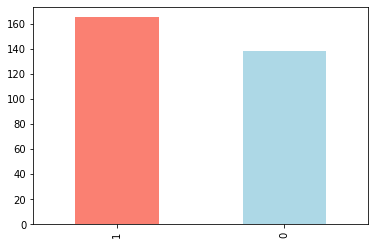

In [13]:
# Looks to be a fairly balanced classification problem
df["target"].value_counts().plot(kind='bar', color=['salmon', "lightblue"])

In [14]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


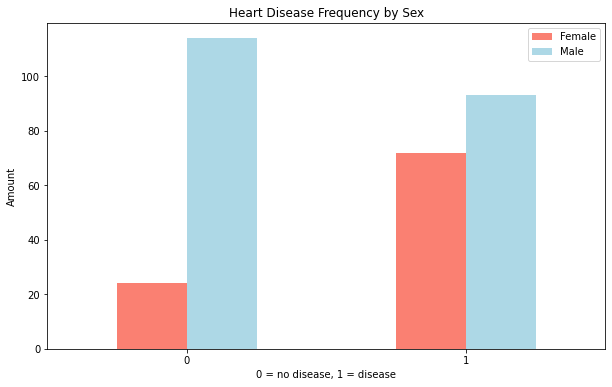

In [25]:
#Hmmm. Women in this sample are about 75% chance of having heart disease. For males, it's around 40%.
# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', "lightblue"])
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [26]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

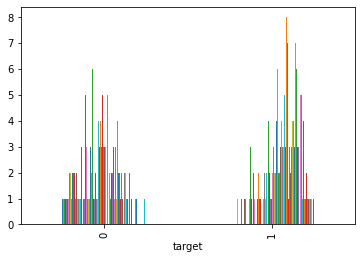

In [32]:
pd.crosstab(df.target, df.thalach).plot.bar(legend=False)

## Age vs. Max Heart Rate for Heart Disease

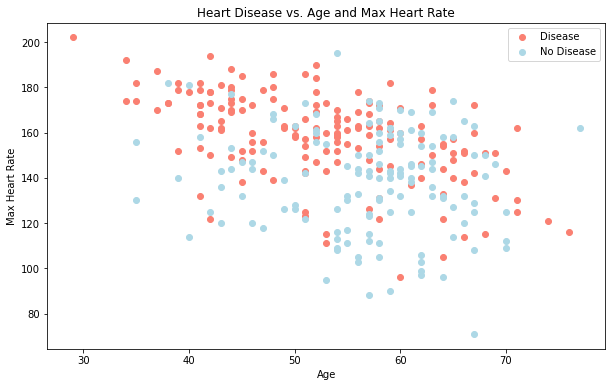

In [40]:
# Create a figure with two plots
plt.figure(figsize=(10, 6))

# Scatter with positive examples first
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0],
           c='lightblue');
# Add some helpful info
plt.title("Heart Disease vs. Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

We can see a slight down trend, but nothing obvious

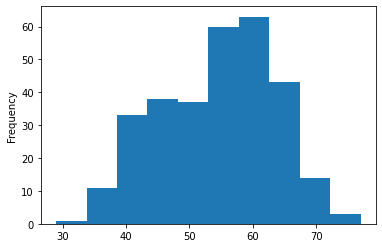

In [42]:
# What's the distribution of the age column
# Make a histogram to answer this
df.age.plot.hist();

We can see that the sample popuplation is older. Age of the sample is approx normally distributed, as expected. We don't see significant outliers.

Does chest pain relate to if someone has heart disease?

cp - chest pain type 
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

We can check this quickly with a cross tab

In [43]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


It seems that chest pain coincides with heart disease.



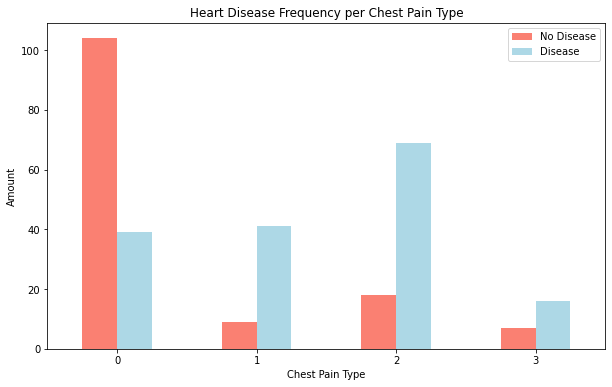

In [45]:
# Make the crosstab more visual.
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10, 6), 
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

This raises an interesting question.. Why does non-chest pain (2) have such a high rate of heart disease?

In [46]:
# Combine some independant variables and compare with target
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

There's 91 different types, (length: 91), so a bar graph wouldn't be illustrative.



Let's learn about correlation with a correlation matrix.

In [51]:
# Make a correlation matrix.
corr_mat = df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


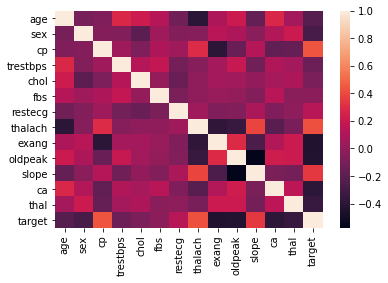

In [52]:
sns.heatmap(corr_mat)


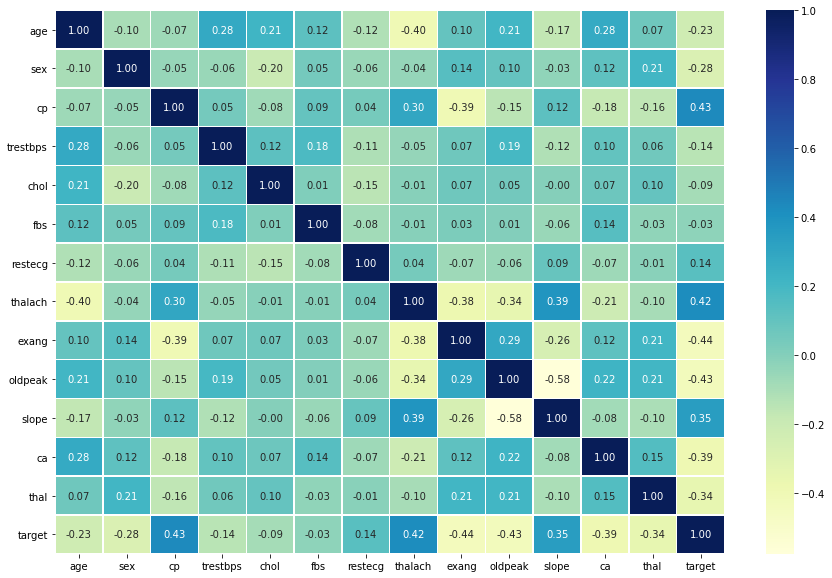

In [54]:
# Let's make a prettier matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidth=0.5,

                 fmt=".2f",
                cmap="YlGnBu");

Looks like the most important single features are cp, thalach, and slope (from positive correlation), and exang, oldpeak, ca, and thal (negative correlation)

# 5. Modeling

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df.target

In [59]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

Now that we've split the data into train and test, it's time to fit a model.

We're going to try 3 different methods.
1. Logistic Regression (despite its name, it's for clasification not regression)
]]
2. K Nearest Neighbors
3. Random Forest Classifier

In [61]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), 
         "KNN": KNeighborsClassifier(), 
         "Random Forest": RandomForestClassifier()}

# Creatre a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluats given machine learning models;
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [66]:
model_scores = fit_and_score(models=models, 
                              X_train=X_train, 
                              X_test=X_test, 
                              y_train=y_train, 
                              y_test=y_test)

C:\Users\allen\Github\ml_workbook\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model comparison

In [69]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.881579,0.697368,0.815789


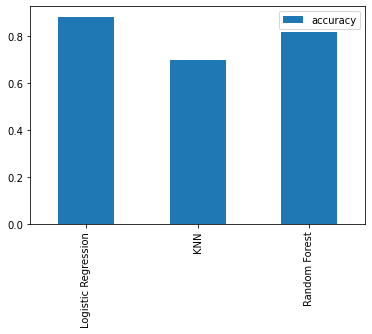

In [72]:
model_compare.T.plot.bar();

KNN is not performing well in baseline settings, so we won't proceed with it.

Now, we've got a baseline model. Let's look at the following:
(For any problem):

* Huperparameter turning
* Feature importance
* Confusion matrix

(For classification):
* Cross-validation
* Precision
* Recall
* F1 score
* Classification
* ROC curve
* Area under curve (AUC)

On second thought, let's tune KNN.

In [79]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    
train_scores, test_scores

([1.0,
  0.7929515418502202,
  0.7709251101321586,
  0.7444933920704846,
  0.7577092511013216,
  0.73568281938326,
  0.7268722466960352,
  0.7136563876651982,
  0.7224669603524229,
  0.7136563876651982,
  0.7312775330396476,
  0.7136563876651982,
  0.7092511013215859,
  0.6960352422907489,
  0.6960352422907489,
  0.6784140969162996,
  0.6960352422907489,
  0.6607929515418502,
  0.6916299559471366,
  0.6784140969162996],
 [0.6052631578947368,
  0.6052631578947368,
  0.6710526315789473,
  0.6973684210526315,
  0.6973684210526315,
  0.7105263157894737,
  0.7236842105263158,
  0.7236842105263158,
  0.7105263157894737,
  0.7368421052631579,
  0.75,
  0.7105263157894737,
  0.7105263157894737,
  0.6973684210526315,
  0.6842105263157895,
  0.7236842105263158,
  0.7236842105263158,
  0.7236842105263158,
  0.7368421052631579,
  0.7236842105263158])

Maximum KNN score on the test data: 75.00%


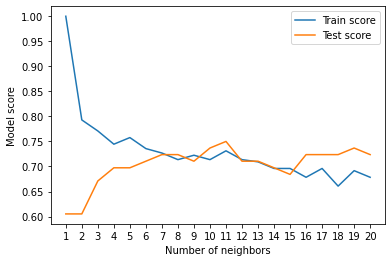

In [81]:
# These are best visualized
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Even with hyperparameter tuning, we find the KNN cannot be tuned to meet the scores for the other estimators (0.88, and 0.81). We'll discard KNN now.

### Hyperparameter tuning with RandomizedSearchCV

We'll tune thse two using RandomizedSearchCV
1. Logistic Regression
2. Random Forest Classifier

Do an internet search to find which hyperparameters to tune

In [100]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
          "max_depth": [None, 3, 5, 10], 
          "min_samples_split": np.arange(2, 20, 2), 
          "min_samples_leaf": np.arange(1, 20, 2)}


Now we've got the hyperparameter grids set up for each of our models, let's tune them using RandomizedSearchCV.


In [101]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [103]:
rs_log_reg.score(X_test, y_test)

0.8947368421052632

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [105]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid, 
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [107]:
# Show the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [108]:
# Show the score
rs_rf.score(X_test, y_test)

0.8421052631578947

Nice!  We have a slight imoprovement in accuracy over the baseline.

### Hyperparameter turning with GridSearchCV

Since our LogisticRegression model provides the best results so far, let's continue by optimizing that one using GridSearchCV.




In [109]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
               "solver": ["liblinear"]}

# Setup grid hyperparameter search from LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid=log_reg_grid, 
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


In [111]:
# Check the best hyperparameteres
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [113]:
gs_log_reg.score(X_test, y_test)

0.8947368421052632

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

and it would be great if cross-validation were used where possible.

Yo make comparisons and evaluate our trained model, first we need to make predictions.

In [115]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [116]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
22     1
258    0
56     1
242    0
114    1
Name: target, Length: 76, dtype: int64

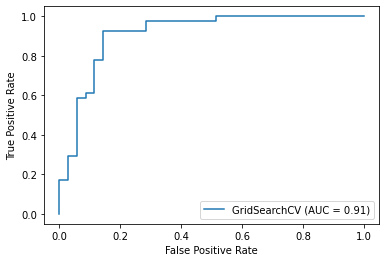

In [119]:
# ROC curve and calculate AUC metric


plot_roc_curve(gs_log_reg, X_test, y_test);

In [120]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[30  5]
 [ 3 38]]


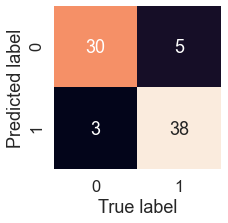

In [124]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, AUC metric, and confusion matrix. Let's make a classfication report.

In [125]:
# Classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



We made a classification report, but it wasn't cross-validated.

### Calculate accuracy, precision, and F1-score using cross-validation

In [145]:
# Setup a new instance of classifier using best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [146]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                        solver="liblinear")

In [147]:
# Cross-validated accuracy
cross_val_acc = np.mean(cross_val_score(clf, X_test, y_test, scoring="accuracy"))
cross_val_acc

0.8150000000000001

In [148]:
# Cross_validated precision
cross_val_precision = np.mean(cross_val_score(clf, X_test, y_test, scoring="precision"))
cross_val_precision

0.8130952380952381

In [149]:
# Cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf, X_test, y_test, scoring="recall"))
cross_val_recall

0.8777777777777779

In [150]:
# Cross-validated F1-score
cross_val_f1_score = np.mean(cross_val_score(clf, X_test, y_test, scoring="f1"))
cross_val_f1_score

0.837483660130719

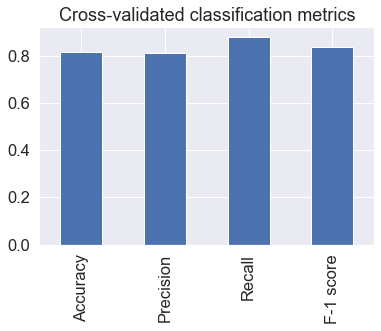

In [155]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cross_val_acc,
                          "Precision": cross_val_precision,
                          "Recall": cross_val_recall,
                          "F-1 score": cross_val_f1_score}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature importance

Feature importance is another way of asking, "Which features contribued most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance from our LogisticRegression model.

In [157]:
# Fit an instance of LogisticRegression

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [159]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [160]:
# Check coef_
clf.coef_

array([[ 0.00503922, -0.76947823,  0.68812983, -0.00991719, -0.00127896,
         0.00226276,  0.40721864,  0.02147257, -0.60142004, -0.54531813,
         0.45519223, -0.6569426 , -0.70184842]])

In [162]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.005039217458160402,
 'sex': -0.7694782276592139,
 'cp': 0.688129827739253,
 'trestbps': -0.009917190989074681,
 'chol': -0.0012789615985874185,
 'fbs': 0.0022627589171800456,
 'restecg': 0.4072186422444174,
 'thalach': 0.021472565870646654,
 'exang': -0.6014200449986924,
 'oldpeak': -0.5453181265580906,
 'slope': 0.4551922310944869,
 'ca': -0.6569426015311344,
 'thal': -0.7018484162279376}

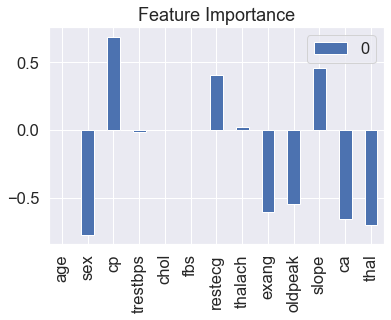

In [164]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature Importance");

In [165]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [166]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart